## Imports & Make it Pretty

In [380]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as scs

#make it pretty
plt.style.use('ggplot')

%matplotlib inline


## Data Data and ... More Data

In [252]:
# unless otherwise noted :  data sets are 2009 June 1 - 2019 May 31 = dataset 2009
df_2009 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1749343.csv", low_memory=False)
df_1999 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1749348.csv", low_memory=False)
df_1989 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1749350.csv", low_memory=False)
# 1973 - 1979
df_1973 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1979.csv", low_memory=False)
# 1964 - 1973 - no idea why they weren't in the other data sets ...
df_missing = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/test.csv", low_memory=False)
# 1959 - 1964
df_1959 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1969.csv", low_memory=False)
df_1949 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1959.csv", low_memory=False)
# october 1943 - May 31 1949
df_1943 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1949.csv", low_memory=False)


## Functions

In [253]:
# clean data set of null values for one column
# returns new dataframe

def no_more_null (df, column_not_null):
    df_mask = df[column_not_null].notnull()
    new_df = pd.DataFrame(df[df_mask])
    return new_df

def year_month_cols (df):
    df['year'] = pd.DatetimeIndex(df.loc[:,'DATE']).year
    df['month'] = pd.DatetimeIndex(df.loc[:,'DATE']).month
    return df

#### Do Stuff with the Data and Functions
## Take some columns from all Datasets and make 1 Dataset 

In [254]:
# to figure out what columns would be useful

# df_dropna = df_1943.dropna(axis=1,thresh=9000)
# df_dropna.shape
# df_dropna

In [255]:
# list of all datasets:
lst_1949_2019 = [df_1943, df_1949, df_1959, df_missing, df_1973, df_1989, df_1999, df_2009]

In [256]:
# list of all columns I want to include:
lst_cols = ["DATE","MonthlyMeanTemperature", "MonthlyMaximumTemperature", "MonthlyMinimumTemperature", "ShortDurationPrecipitationValue150", "DailyAverageDryBulbTemperature", "HourlyDryBulbTemperature", "TStorms", "MonthlyTotalSnowfall", "DailySnowfall", "DailySnowDepth"]


In [257]:
# get only cols I want
col_dfs = [x[lst_cols] for x in lst_1949_2019]

In [258]:
# combine all dfs into one df
all_dfs = pd.concat(col_dfs, axis=0)

In [259]:
# check that they all combined
all_dfs.shape
#all_dfs.head()

(525458, 11)

In [260]:
all_dfs.loc[107542,"HourlyDryBulbTemperature"]

107542    NaN
107542    NaN
Name: HourlyDryBulbTemperature, dtype: object

In [261]:
# remove null values and get year and month columns
all_dfs_no_null = no_more_null(all_dfs, "HourlyDryBulbTemperature")
#all_dfs_no_nulls = no_more_null(all_dfs, "DailyAverageDryBulbTemperature")
all_dfs_no_null.shape

# lost ~ 50,000 rows by doing no null Hourly Dry Bulb Temperature


(476267, 11)

In [262]:
#df_1943.dropna(axis=1, thresh = 600)

In [263]:
# check for repetition



# didn't work - came back with only 12823 entries
# DatetimeIndex = all_dfs["DATE"]
# date_all_dfs = all_dfs[DatetimeIndex.duplicated(keep='first')]
# date_all_dfs.shape

# print(any(all_dfs_no_null['DATE'].duplicated()))

drop_duplicate_dates = (all_dfs_no_null.drop_duplicates("DATE")).copy()
drop_duplicate_dates.shape


(463700, 11)

In [291]:
# now we have all the data 10/1943 - 5/2019 duplicate dates removed, rows with null HourlyDryBulbTemperature removed

# want the average temperature 1/1952 - 12/1999 to use as the base for the temperature anomaly maths

# first need to make year and month columns
mega_dfs = year_month_cols(drop_duplicate_dates)

ymhdbt = mega_dfs[["year","month","HourlyDryBulbTemperature"]]
#all_dfs_no_null.info()

ymhdbt["HourlyDryBulbTemperature"].dtype

dtype('float64')

In [265]:
ba_df = pd.DataFrame(mega_dfs[mega_dfs["year"] < 2000 ])
b_df = pd.DataFrame(ba_df[ba_df["year"] > 1951])

# base_df == 1952 - 1999

# get mean of HourlyDryBulbTemperature
base_df = b_df.reset_index()

type(base_df.loc[0,"HourlyDryBulbTemperature"]) == float

#base_df[base_df["HourlyDryBulbTemperature"] 

base_df["HourlyDryBulbTemperature"].astype(float, errors='ignore').isna().sum()

0

In [266]:
base_df["HourlyDryBulbTemperature"].tail()
base_df.loc[261185,"HourlyDryBulbTemperature"]

'46'

In [267]:
base_df["HourlyDryBulbTemperature"].astype(int, errors='ignore')[261184] #.map(np.isreal)

'46'

In [268]:
indices = (~base_df["HourlyDryBulbTemperature"].astype(str).str[-1].str.isnumeric())
base_df.loc[indices,"HourlyDryBulbTemperature"] = base_df.loc[indices,"HourlyDryBulbTemperature"].str[:-1]

In [269]:
base_df["HourlyDryBulbTemperature"] = base_df["HourlyDryBulbTemperature"].astype(float)
base_mean = base_df["HourlyDryBulbTemperature"].mean()
base_mean

52.89116185400442

In [289]:
mega_dfs["HourlyDryBulbTemperature"].dtype

dtype('float64')

In [286]:
mega_dfs["HourlyDryBulbTemperature"] = mega_dfs["HourlyDryBulbTemperature"].map(lambda x:float(x) if x!="" else np.nan)



In [ ]:
# convert to celsius b/c I want to compare anything with any other climate concerned scientist not in USA

In [ ]:
mega_year = pd.DataFrame(mega_dfs[["year","HourlyDryBulbTemperature"]])
year_ms = mega_year.groupby("year")
year_means = pd.DataFrame(year_ms["HourlyDryBulbTemperature"].mean())

# (32°F − 32) × 5/9 = 0°C

year_means["mean temp in C"] = year_means["HourlyDryBulbTemperature"].map(lambda x:((x-32)*(5/9)))


# diff between base_mean and year_mean
year_means["raw_anomaly"] = year_means["mean temp in C"] - ((base_mean-32)*(5/9))

year_means = year_means.reset_index()

#take out 1943 and 2019 b/c they aren't full years
year_means = year_means.iloc[1:53,:]

# 2003 aka index 37 is also incomplete
year_means = year_means.drop(37)
year_means

In [ ]:
# plot temperature anomaly for 1944-2018

fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.plot(year_means['year'],year_means["raw_anomaly"] , label = "temp anomalies")
ax.set_yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])

ax.set_xticks(year_means['year'])
ax.set_title("annual temperature anomalies 1944 - 2018, Boeing Field")
ax.legend(loc='best')

plt.show()

In [ ]:
# row 37, year 2003 - -16 :()

In [ ]:
#mega_dfs[mega_dfs["month"] == 8].count()
# do the anomalies to the right half vary significantly from the anomalies to the left?

In [ ]:
# is ratio of change in my set in my years == to the ratio of change in the paleo?

In [300]:
# need to look at years and see distribution of data throughout the months - equalize if needed

def months_equally_weighted(df,lst_years,col):
    # for each year in the df
    # each month equal to 1/12 of the average if there are 12
    # return list of year:month for any month that doesn't have values
    
    # create list to return with month means = 0
    zero_months = []
    half_years = []
    # list of years,means
    weighted_years = []
    
    
# year_means = pd.DataFrame(year_ms["HourlyDryBulbTemperature"].mean())
    
    
    # for each year lst of years in df
    for year in lst_years:
        # list of means from months
        means = []
        temp_df = df[df["year"] == year]
        #print(year)
        # get mean value for each month in the year:
        for x in range(1,13):
            res = temp_df[temp_df["month"] == x][col].astype(float).mean()
            #print(res)
            #if res == np.inf:
                #return temp_df[temp_df["month"] == x][col]
                #print("shape is:", temp_df[temp_df["month"] == x][col].shape)
            # if mean = 0, add (year,month) to list
            if res is np.nan:
                zero_months.append((year, x))
            # else, add to means list
            else:
                means.append(res)
            
        # if the means list length = 12, find average and add to weighted years list as a tuple year, mean
        if len(means) == 12:
            year_mean = ((sum(means))/ 12)
            weighted_years.append((year, year_mean))
        elif len(means) > 6:
            half_years.append(year)
            
        
    # return lists
   # f"months with a mean of zero: {zero_months}  years with all months present: {weighted_years} years with half data: {half_years}"
    return weighted_years

In [301]:
# remove null values
no_null = ymhdbt[~(ymhdbt["HourlyDryBulbTemperature"].astype(str) == '')]
no_null["HourlyDryBulbTemperature"].dtype

dtype('float64')

In [306]:
lst_years = range(1948,2019)
#months_equally_weighted(no_null,lst_years,"HourlyDryBulbTemperature")

In [ ]:
lst_years_full_means = [(1948, 50.455753804307456), (1949, 51.09267230401621), (1950, 50.919219630616205), (1951, 51.78865652013661), (1952, 51.8261236792356), (1953, 52.97431085103907), (1954, 51.1060678148094), (1955, 49.53755520353303), (1956, 51.15959608062598), (1957, 52.12764277856068), (1958, 55.27397478553029), (1959, 52.29977575415432), (1960, 52.27956886252213), (1961, 53.45553797953803), (1962, 52.60240548728453), (1963, 53.22705399812256), (1964, 51.69430110773467), (1973, 53.64130172504915), (1974, 52.88590856344973), (1975, 51.67609521643754), (1976, 52.3074905489264), (1977, 52.1296581805739), (1978, 53.389299635928836), (1990, 53.18128995519865), (1991, 53.632415381657296), (1992, 55.00241205319693), (1993, 52.69270885158401), (1994, 53.87297820985794), (1995, 54.82820939862651), (1996, 52.99434575350828), (1997, 55.36379672420757), (1998, 54.848463257569655), (1999, 51.884414916575615), (2004, 53.97428721914963), (2005, 53.112185260926225), (2006, 52.798328316498726), (2007, 52.01561420477822), (2008, 50.91059034539035), (2009, 52.2253870213153), (2010, 53.37580671358114), (2011, 51.02571711984253), (2012, 52.106444323530845), (2013, 53.888145478704566), (2014, 56.110870708936936), (2015, 57.26531578956229), (2016, 54.885751507220924), (2017, 52.903754011264255), (2018, 54.11155210720697)]



In [305]:
# sets of full years as lists of tuples (year, mean)

means48_64 = months_equally_weighted(no_null, range(1948,1965), "HourlyDryBulbTemperature")
means73_78 = months_equally_weighted(no_null, range(1973,1979), "HourlyDryBulbTemperature")
means90_99 = months_equally_weighted(no_null, range(1990,2000), "HourlyDryBulbTemperature")
means04_18 = months_equally_weighted(no_null, range(2004,2019), "HourlyDryBulbTemperature")

In [307]:
# could do month or year comparison

In [422]:
years48_64 = [x[0] for x in means48_64]
years73_78 = [x[0] for x in means73_78]
years90_99 = [x[0] for x in means90_99]
years04_18 = [x[0] for x in means04_18]
#years48_64

[1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964]

In [408]:
# year comparison (temp anomaly yearly) = base_mean - year mean from lists
anomaly48_64 = list(map(lambda x:x[1]- base_mean, means48_64))
anomaly73_78 = list(map(lambda x:x[1]- base_mean, means73_78))
anomaly90_99 = list(map(lambda x:x[1]- base_mean, means90_99))
anomaly04_18 = list(map(lambda x:x[1]- base_mean, means04_18))

lcd_anomaly = anomaly48_64+anomaly73_78+anomaly90_99+anomaly04_18
lcd_anomaly_mean = sum(lcd_anomaly) / len(lcd_anomaly)

anomaly48_

# [x[1]-base_mean for x in list ]

0.0017705447877368978

In [356]:
#all_anomaly

In [349]:
# bring in data from paleoclimatology dataset

df = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/shi2013nh.txt",sep="\t", low_memory=False, comment='#')
paleo48_64 = df[(df["age_AD"] > 1947) & (df["age_AD"] < 1965)][["age_AD", "tempanom-ann"]]
paleo73_78 = df[(df["age_AD"] > 1972) & (df["age_AD"] < 1979)][["age_AD", "tempanom-ann"]]
paleo90_99 = df[(df["age_AD"] > 1989) & (df["age_AD"] < 2000)][["age_AD", "tempanom-ann"]]

# could fit a line and extrapolate the 2004 - 2018 anomalies


# df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]



In [340]:
paleo48_64

,age_AD,tempanom-ann
948,1948,-0.032
949,1949,-0.027
950,1950,-0.025
951,1951,-0.020
952,1952,-0.008
953,1953,0.009
954,1954,0.049
955,1955,0.100
956,1956,0.122
957,1957,0.117


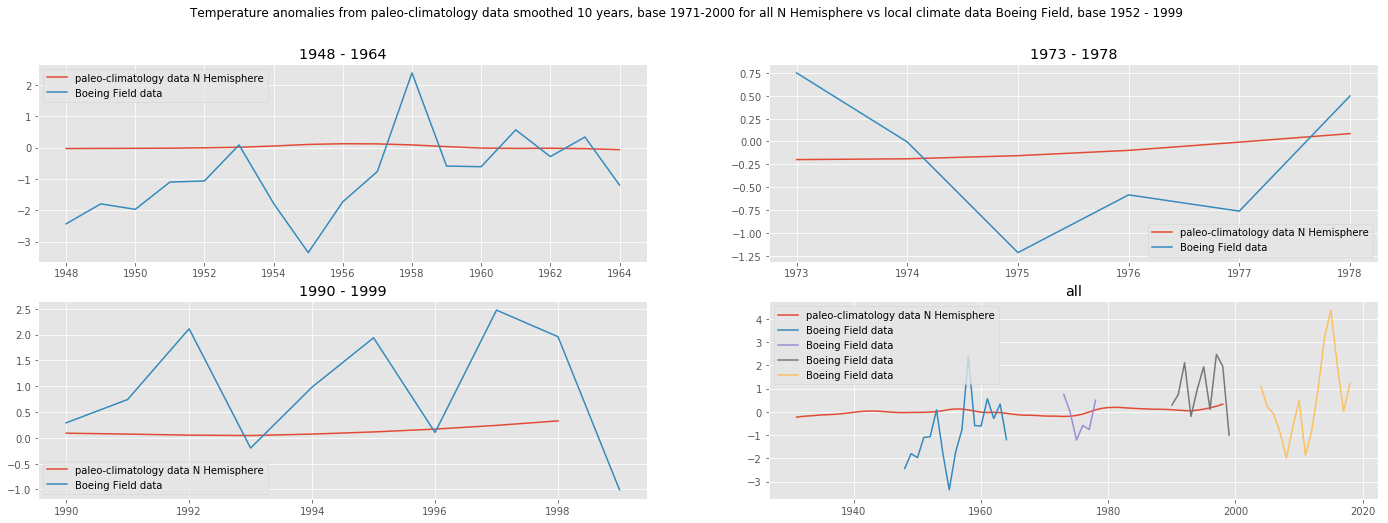

In [378]:
fig, axs = plt.subplots(2, 2, figsize=(24, 8))
a = axs.flatten()
a[0].plot(paleo48_64["age_AD"], paleo48_64["tempanom-ann"], label= "paleo-climatology data N Hemisphere")
a[0].plot(paleo48_64["age_AD"], anomaly48_64, label= "Boeing Field data")
a[0].set_title("1948 - 1964")
a[0].legend(loc='best')

a[1].plot(paleo73_78["age_AD"], paleo73_78["tempanom-ann"], label= "paleo-climatology data N Hemisphere")
a[1].plot(paleo73_78["age_AD"], anomaly73_78, label= "Boeing Field data")
a[1].set_title("1973 - 1978")
a[1].legend(loc='best')

a[2].plot(paleo90_99["age_AD"], paleo90_99["tempanom-ann"], label= "paleo-climatology data N Hemisphere")
a[2].plot(paleo90_99["age_AD"], anomaly90_99, label= "Boeing Field data")
a[2].set_title("1990 - 1999")
a[2].legend(loc='best')

a[3].plot(df[df["age_AD"] > 1930][["age_AD"]], df[df["age_AD"] > 1930][["tempanom-ann"]], label= "paleo-climatology data N Hemisphere")
a[3].plot(years48_64, anomaly48_64, label= "Boeing Field data")
a[3].plot(years73_78, anomaly73_78, label= "Boeing Field data")
a[3].plot(years90_99, anomaly90_99, label= "Boeing Field data")
a[3].plot(years04_18, anomaly04_18, label= "Boeing Field data")
a[3].set_title("all")
a[3].legend(loc='best')



fig.suptitle('Temperature anomalies from paleo-climatology data smoothed 10 years, base 1971-2000 for all N Hemisphere vs local climate data Boeing Field, base 1952 - 1999')
plt.show()



In [379]:
# null hypothesis significance testing
# H0 = the local climate data and the N. Hemi paleo data are the same (aka: are they the same? yes) has to be two values
# is rate of change same 

# comparing two values

# Ha = not the same
# model - mean - normal distributions - 

# z-test (mean - mean) / (sq root of (variance squared /n) - (variance square/n))

# stats.norm.cdf(z value)

# if z value is less than alpha - yay!

# alpha 
# statistical power - .... maybe later

# time series - moving average - discrete samples of theirs (could smooth mine)

# function / method for smoothing - to make data sets more similar

# stats.mannwhitneyu(set, set)

# np.gradient - look into later


'''
# linear regression for both - np.gradient, fill in missing for both and then compare again
# next steps = use correlation to hypothesize what temperature was like 1000 years ago in Seattle
'''

In [385]:
# mann whitney test - no smoothing
# alpha = .05  paleo90_99["tempanom-ann"]  anomaly90_99


pvalue48_64 = scs.mannwhitneyu(paleo48_64["tempanom-ann"], anomaly48_64)
pvalue73_78 = scs.mannwhitneyu(paleo73_78["tempanom-ann"], anomaly73_78)
pvalue90_99 = scs.mannwhitneyu(paleo90_99["tempanom-ann"], anomaly90_99)


In [401]:
print(f"For full years in LCD compared to same years in paleo set:\npvalue for 1948 - 1964: {pvalue90_99[1]}\npvalue for 1973 - 1978: {pvalue73_78[1]}\npvalue for 1990 - 1999: {pvalue90_99[1]}")



For full years in LCD compared to same years in paleo set:
pvalue for 1948 - 1964: 0.10606095893069767
pvalue for 1973 - 1978: 0.4680931467365297
pvalue for 1990 - 1999: 0.10606095893069767


In [519]:
# rate of change 1948 - 1999 compare

# np.diff for yearly mean
prates = []
prates.append(list(np.diff(x) for x in [paleo48_64["tempanom-ann"].values]))
prates.append(list(np.diff(x) for x in [paleo73_78["tempanom-ann"].values]))
prates.append(list(np.diff(x) for x in [paleo90_99["tempanom-ann"].values]))

# leave off last list bc there is not an equal list in p_list
lcd_list = [anomaly48_64, anomaly73_78, anomaly90_99]
lcdrates = [np.diff(x) for x in lcd_list]

yearsets = [paleo48_64["age_AD"].values, paleo73_78["age_AD"].values, paleo90_99["age_AD"].values]
lcdrates

[array([ 0.6369185 , -0.17345267,  0.86943689,  0.03746716,  1.14818717,
        -1.86824304, -1.56851261,  1.62204088,  0.9680467 ,  3.14633201,
        -2.97419903, -0.02020689,  1.17596912, -0.85313249,  0.62464851,
        -1.53275289]),
 array([-0.75539316, -1.20981335,  0.63139533, -0.17783237,  1.25964146]),
 array([ 0.45112543,  1.36999667, -2.3097032 ,  1.18026936,  0.95523119,
        -1.83386365,  2.36945097, -0.51533347, -2.96404834])]

In [559]:
len(prates[1][0])

5

1

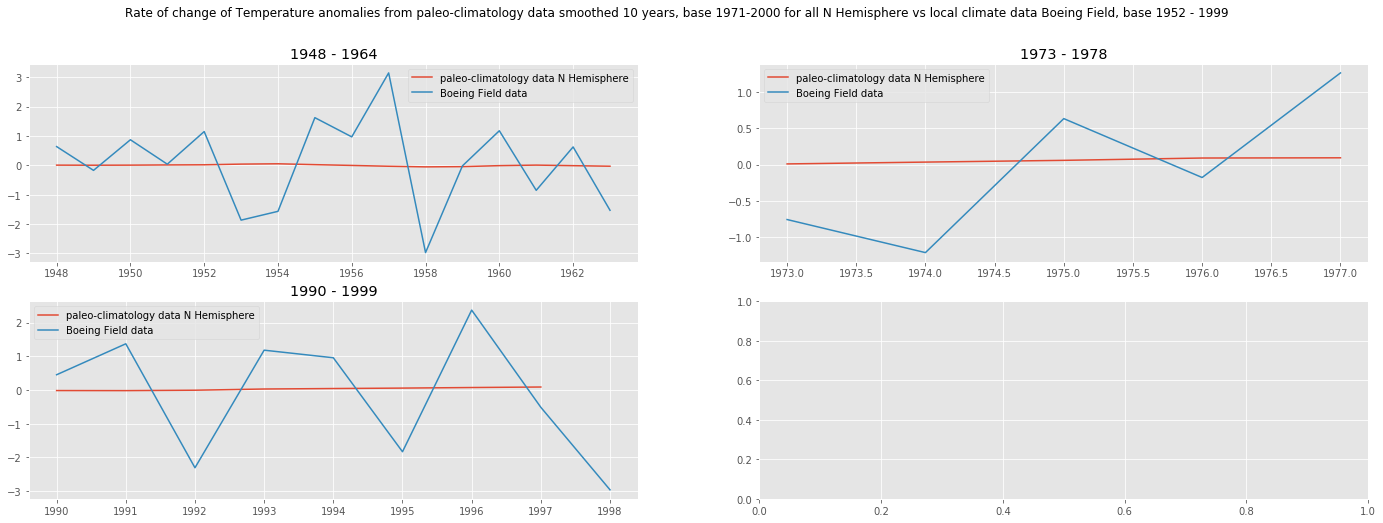

In [547]:
# plot rate of change for each subset

fig, axs = plt.subplots(2, 2, figsize=(24, 8))

for p, lcd, year, idx, ax in zip(prates, lcdrates, yearsets, [0,1,2,3], axs.flatten()):
    ax.plot(year[:-1], np.array(p).reshape(-1,1), label= "paleo-climatology data N Hemisphere")
    ax.plot(year[:-1], lcd, label= "Boeing Field data")
    ax.set_title(f"{year[0]} - {year[-1]}")
    ax.legend(loc='best')

fig.suptitle('Rate of change of Temperature anomalies from paleo-climatology data smoothed 10 years, base 1971-2000 for all N Hemisphere vs local climate data Boeing Field, base 1952 - 1999')
plt.show()

In [560]:
# mann whitney test - no smoothing
# alpha = .05  paleo90_99["tempanom-ann"]  anomaly90_99


pvaluerate48_64 = scs.mannwhitneyu(prates[0][0], lcdrates[0])
pvaluerate73_78 = scs.mannwhitneyu(prates[1][0], lcdrates[1])
pvaluerate90_99 = scs.mannwhitneyu(prates[2][0], lcdrates[2])

print(f"For full years in LCD compared to same years in paleo set:\npvalue for slope 1948 - 1964: {pvalue90_99[1]}\npvalue for slope 1973 - 1978: {pvalue73_78[1]}\npvalue for slope 1990 - 1999: {pvalue90_99[1]}")


For full years in LCD compared to same years in paleo set:
pvalue for slope 1948 - 1964: 0.10606095893069767
pvalue for slope 1973 - 1978: 0.4680931467365297
pvalue for slope 1990 - 1999: 0.10606095893069767


In [ ]:
# exactly the same as the pvalues for the means